In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:

def lorenz_system(t, y, sigma=10, beta=8/3, rho=28):
    """Lorenz system of differential equations.
    Learn more: https://en.wikipedia.org/wiki/Lorenz_system
    """
    x, y, z = y
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [9]:
#Parameters
sigma = 10
rho = 28
beta = 8/3

#Intial conditions
y0 = [1.0, 0.0, 0.0]

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
solution = solve_ivp(lorenz_system, t_span, y0, args=(sigma, beta, rho), t_eval=t_eval)
x, y, z = solution.y

print(solution.y)



[[ 1.00000000e+00  9.54606060e-01  9.17896835e-01 ... -2.73738253e+00
  -2.77947979e+00 -2.82560274e+00]
 [ 0.00000000e+00  1.36387062e-01  2.66393157e-01 ... -3.53901367e+00
  -3.66154280e+00 -3.78829380e+00]
 [ 0.00000000e+00  3.31615330e-04  1.26126983e-03 ...  1.79051283e+01
   1.77172791e+01  1.75344424e+01]]


In [24]:
#Second IVP
y0_2 = [1.01, 0.0, 0.0]  # Slightly different initial condition
solution_2 = solve_ivp(lorenz_system, t_span, y0_2, args=(sigma, beta, rho), t_eval=t_eval)
x2, y2, z2 = solution_2.y

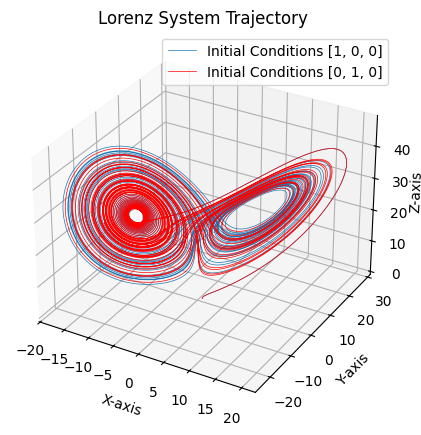

In [31]:
#Plot the results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.plot(x2, y2, z2, lw=0.5, color='r')
ax.set_title('Lorenz System Trajectory')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis', rotation=90)
ax.zaxis.labelpad=-2
ax.legend(['Initial Conditions [1, 0, 0]', 'Initial Conditions [0, 1, 0]'])
plt.show()